# Aufgabe 2
## Teilaufgabe a

Die Gleichung $f(E, \Theta)$ ist numerisch instabil, da $\beta$ im Regelfall fast 1 ist und somit der Nenner für $\Theta \approx \pi$ ungefähr $1-1$ wird.

Unter der Annahme, das der Nennerbetrag nicht kleiner als $0,01$ werden soll, ist das stabile Interval gegeben durch:
$$ \gamma = \frac{50\text{GeV}}{511\text{keV}} \approx 10^5 $$
$$ \rightarrow \beta = \sqrt{1-10^{-10}}\approx 1 $$
$$ \Theta_\text{grenz} = \pm \text{arccos}(\sqrt{0.99}) = \pm 0,1 \text{ rad bzw. } \pm 5,7° $$
$f(E >> m_e, \Theta)$ ist stabil für $\Theta\in[5,7° ; 354,3°]$

## Teilaufgabe b


\begin{align}
 & \frac{2+\sin^2(\Theta)}{1-\beta^2\cos^2(\Theta)} \\
\leftrightarrow &\frac{2+\sin^2(\Theta)}{1-\beta^2(1-\sin^2(\Theta))} \\
\leftrightarrow &\frac{2+\sin^2(\Theta)}{1-\beta^2+\beta^2\sin^2(\Theta)}\\
\leftrightarrow &\frac{2+\sin^2(\Theta)}{\gamma^{-2}+\beta^2\sin^2(\Theta)}\\
\leftrightarrow &\frac{(2+\sin^2(\Theta))\gamma^2}{1+\gamma^2\beta^2\sin^2(\Theta)}\\
\leftrightarrow &\frac{(2+\sin^2(\Theta))\gamma^2}{1+(\gamma^2-1)\sin^2(\Theta)}
\end{align}


## Teilaufgabe c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize': (15, 10), 'font.size': 12})

/home/fabian/anaconda3/envs/smd/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


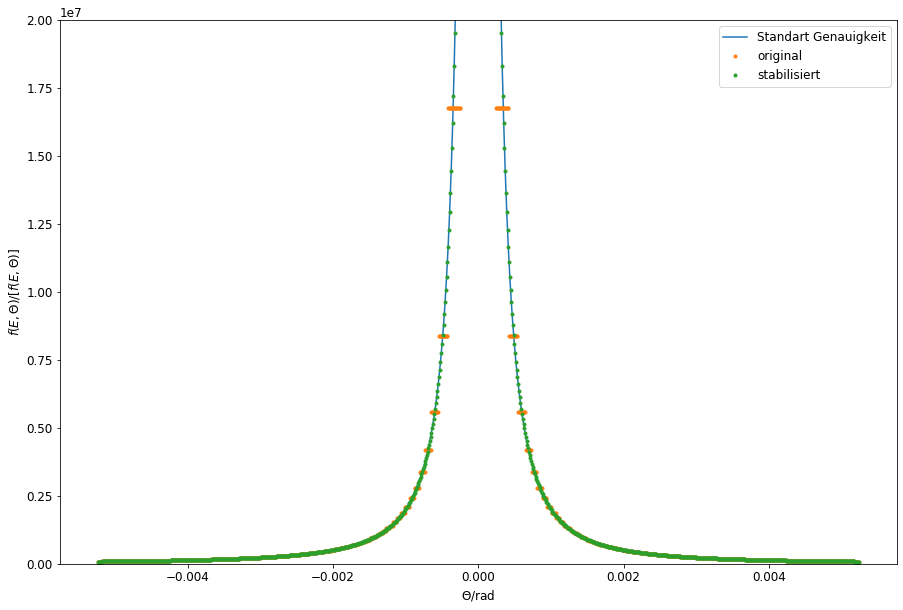

In [2]:
def f_stab(E, theta): # in b) umgeformte Funktion
    gamma2 = (E/511000)**2
    beta2 = 1-1/(gamma2)
    return (2+np.sin(theta)**2)*gamma2 / (1+(gamma2-1)*np.sin(theta)**2)

def f(E, theta): # originale Funktion
    gamma2 = (E/511000)**2
    beta2 = 1-1/(gamma2)
    return (2 + np.sin(theta)**2)/(1-beta2*np.cos(theta)**2)
    
x_plot_err = np.linspace(-1*np.pi/600, np.pi/600, 1000, dtype = "float32") 
                        # extra unpräzise für größere Fehler
x_plot = np.linspace(-1*np.pi/600, np.pi/600, 1000) # Linspace für präzisen Plot
plt.plot(x_plot, f(5*1e10, x_plot), "-",label= "Standart Genauigkeit")
plt.plot(x_plot_err, f(5*1e10, x_plot_err), ".",label= "original")
plt.plot(x_plot_err, f_stab(5*1e10, x_plot_err), ".",label = "stabilisiert")
plt.ylim((-10000, 2*1e7))
plt.xlabel(r"$\Theta /\mathrm{rad}$")
plt.ylabel(r"$f(E,\Theta)/[f(E,\Theta)]$")
plt.legend()

Man sieht, das sich die Ergebnisse der unveränderten Formel zu Stufen ansammeln, während die stabilisierte Formel weiterhin der Standartauswertung folgt.

## Teilaufgabe d

\begin{align}
K &= \left| x\frac{f'(x)}{f(x)}\right| \\
 &= \left| \Theta\frac{2\sin(\Theta)\cos(\Theta)-\frac{2\beta^2\sin(\Theta)\cos(\Theta)(sin^2(\Theta)+2)}{1-\beta^2\cos^2(\Theta)}}{sin^2(\Theta)+2} \right| \text{ powered by WolframAlpha}
\end{align}

## Teilaufgabe e

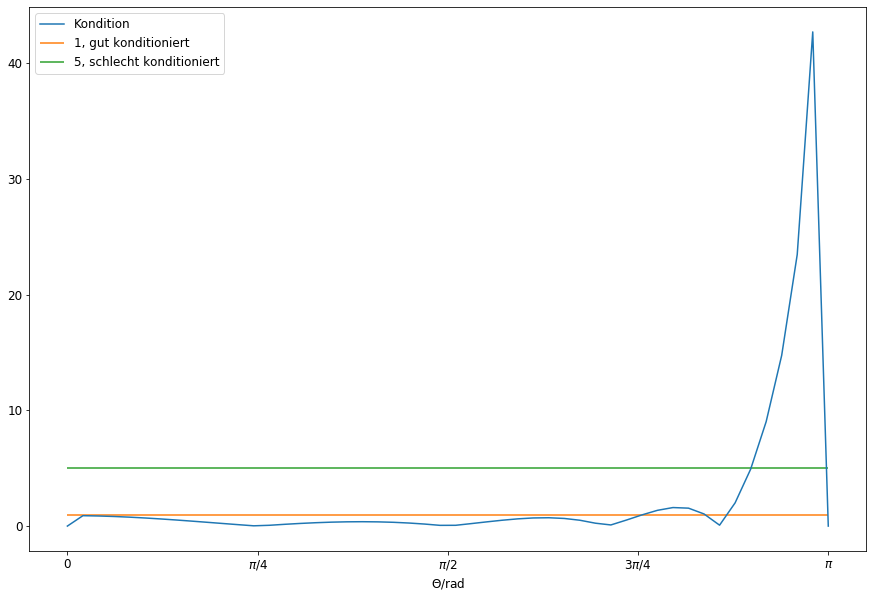

In [3]:
def kon(E, theta): # zur Übersicht aufgeteilte Formel
    gamma2 = (E/511000)**2
    beta2 = 1-1/(gamma2)
    part1 = 2*np.sin(theta)*np.cos(theta) # Minuend
    part2_1 = beta2*part1 *(np.sin(theta**2 +2)) # Zähler des Subtrahend
    part2_2 = 1-beta2*np.cos(theta)**2 # Nenner des Subtrahend
    part3 = np.sin(theta)**2 +2 # globaler Nenner
    return np.abs(theta*(part1-part2_1/part2_2)/part3)

x_plot = np.linspace(0,np.pi,50)
plt.plot(x_plot, kon(5*1e10, x_plot), label = "Kondition")
plt.xticks(np.pi*np.array([0,1/4,1/2,3/4,1]),
           [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$",r"$\pi$"])
plt.hlines(y=1, xmin=0,xmax=np.pi, label ="1, gut konditioniert", color = "tab:orange")
plt.hlines(y=5, xmin=0,xmax=np.pi, label ="5, schlecht konditioniert",
           color = "tab:green")
plt.xlabel(r"$\Theta/\mathrm{rad}$")
plt.legend()

Man sieht, das das Problem fast auf dem ganzen Intervall gut konditioniert ist. Zwischen ca. $3/4 \pi$ und ca. $7/8 \pi$ kommt es zu einer leichten Verstärkung und darüber hinaus zu einer katastrophalen Verstärkung der Fehler.

## Teilaufgabe f

Die Kondition beschreibt die Beschaffenheit des Problems an sich, während die Stabilität über die gewählte Darstellung Auskunft gibt.
Hat man ein schlecht konditoniertes Problem, hilft es nur seine Fragestellung anzupassen bzw. sein Model zu verändern.
Eine schlechten Stabilität hingegen kann man durch umformen und ausnutzen von Identitäten verbessern.